# Model building & training

In [1]:
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
%matplotlib inline 
from matplotlib import pyplot as plt

In [2]:
K.set_image_data_format('channels_last')

In [36]:
dd = pd.read_csv('train_dataset.csv')
dd = dd.drop('Unnamed: 0', axis = 1)
dd.columns = pd.RangeIndex(0,785,1)

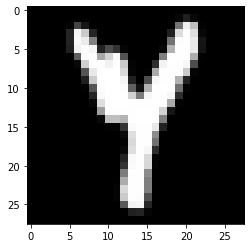

In [49]:
a = np.array(dd.loc[0])[:-1]
a = a.reshape((28,28))
plt.imshow(a.astype('float'), cmap = 'gray')

In [43]:
y_train = dd[[784]]
y_train = np.array(y_train)
y_train = to_categorical(y_train, num_classes=15)

In [44]:
dd_train = dd.drop(784, axis = 1)
dict_to_change= {i:'float32' for i in range(784)}
dd_train = dd_train.astype(dict_to_change)

X_train=[]
for i in range(len(dd)):
    X_train.append(np.array(dd_train.loc[i]).reshape((1,28,28)))   

X_train = np.array(X_train)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[2], X_train.shape[3], X_train.shape[1]))


# Building model

In [732]:
inputs = Input(shape = (28,28,1), dtype = 'float32')
x = Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu')(inputs)
x = Conv2D(32, kernel_size = (5,5), padding = 'same', activation = 'relu')(x)
x = MaxPool2D(pool_size = (2,2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
x = Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu')(x)
x = MaxPool2D(pool_size = (2,2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(256)(x)
x = Dropout(0.25)(x)
output = Dense(15, activation = 'softmax')(x)

model = Model(inputs = inputs, outputs = output)


In [733]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        3692

In [736]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 20, batch_size = 200, shuffle = True, verbose = 1)

Epoch 1/20
249/249 [==============================] - 233s 912ms/step - loss: 3.7931 - accuracy: 0.5585
Epoch 2/20
249/249 [==============================] - 215s 864ms/step - loss: 0.1858 - accuracy: 0.9454
Epoch 3/20
249/249 [==============================] - 238s 958ms/step - loss: 0.1134 - accuracy: 0.9673
Epoch 4/20
249/249 [==============================] - 219s 878ms/step - loss: 0.0844 - accuracy: 0.9744
Epoch 5/20
249/249 [==============================] - 223s 895ms/step - loss: 0.0658 - accuracy: 0.9807
Epoch 6/20
249/249 [==============================] - 217s 870ms/step - loss: 0.0547 - accuracy: 0.9838
Epoch 7/20
249/249 [==============================] - 219s 878ms/step - loss: 0.0516 - accuracy: 0.9840
Epoch 8/20
249/249 [==============================] - 219s 880ms/step - loss: 0.0452 - accuracy: 0.9865
Epoch 9/20
249/249 [==============================] - 216s 869ms/step - loss: 0.0371 - accuracy: 0.9884
Epoch 10/20
249/249 [==============================] - 218s 875m

# Saving model

In [739]:
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2.h5")

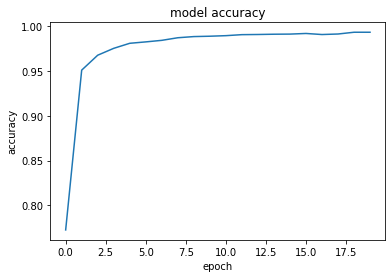

In [738]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()